#### CRC TCR Sequencing Bulk Data Comparison with GSE164522
This notebook includes some analysis on the CRC bulk TCR sequencing dataset, as well as overlap comparison to the GSE164522 dataset. 

#### Set Environment

In [1]:
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Load Data

In [2]:
CRC_data = pd.read_csv('/home/ubuntu/CRC_Project/CRC_blood/CRC_blood_data/downsampled_data.csv')
CRC_data['v_gene'] = CRC_data['V.name'].str.split('*', expand=True)[0]
CRC_data['j_gene'] = CRC_data['J.name'].str.split('*', expand=True)[0]
CRC_data['chain'] = np.where(CRC_data['v_gene'].str.startswith('TRAV'), 'TRA', 'TRB')
CRC_data

,Unnamed: 0,Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,...,FR3.aa,FR4.nt,FR4.aa,V3.Deletions,J3.Deletions,Clone.ID,SampleID,v_gene,j_gene,chain
0,1,91,0.007901,TGTGCCAGCAGGGAGAATCTCTCCTACGAGCAGTACTTC,CASRENLSYEQYF,TRBV6-5*00(1959.9),NaN,TRBJ2-7*00(469.8),11,NaN,...,NaN,NaN,NaN,-6,0,0,pool1_S1,TRBV6-5,TRBJ2-7,TRB
1,2,77,0.006686,TGCGCCAGCAGCGCCAGCCCTTTAGCGGGGGGGCAGGGTGAGCAGT...,CASSASPLAGGQGEQFF,TRBV5-1*00(1877.2),TRBD2*00(46),TRBJ2-1*00(410),12,22.0,...,NaN,NaN,NaN,-4,-9,2,pool1_S1,TRBV5-1,TRBJ2-1,TRB
2,3,73,0.006338,TGCGCCAGCAGCTTGACCGGATCCGCCTACGAGCAGTACTTC,CASSLTGSAYEQYF,TRBV5-1*00(1991.3),NaN,TRBJ2-7*00(450),15,NaN,...,NaN,NaN,NaN,-1,-2,1,pool1_S1,TRBV5-1,TRBJ2-7,TRB
3,4,61,0.005297,TGCAGCGCCGATCAGGGGTCGAATGAGCAGTTCTTC,CSADQGSNEQFF,TRBV29-1*00(1925.9),TRBD1*00(31),TRBJ2-1*00(430),7,12.0,...,NaN,NaN,NaN,-7,-7,3,pool1_S1,TRBV29-1,TRBJ2-1,TRB
4,5,45,0.003907,TGTGCCAGCAGCTCGAGGGGCCTTCAGAACTATGGCTACACCTTC,CASSSRGLQNYGYTF,TRBV7-9*00(1950.9),TRBD2*00(31),TRBJ1-2*00(460),13,14.0,...,NaN,NaN,NaN,-4,-2,4,pool1_S1,TRBV7-9,TRBJ1-2,TRB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489389,1489390,1,0.000087,TGTGCCAGCAGTGATGTGGGCTACACCTTC,CASSDVGYTF,TRBV6-1*00(2120),NaN,TRBJ1-2*00(400),14,NaN,...,NaN,NaN,NaN,-3,-8,97220,pool9_S9,TRBV6-1,TRBJ1-2,TRB
1489390,1489391,1,0.000087,TGTGCCAGCAGCTCCTACGAGCAGTACTTC,CASSSYEQYF,TRBV28*00(2060),NaN,TRBJ2-7*00(490),11,NaN,...,NaN,NaN,NaN,-6,5,97230,pool9_S9,TRBV28,TRBJ2-7,TRB
1489391,1489392,1,0.000087,TGTGCAAGTCGCTTAGAAAAACTGTTTTTT,CASRLEKLFF,TRBV12-2*00(981),NaN,TRBJ1-4*00(430),16,NaN,...,NaN,NaN,NaN,-1,-8,97270,pool9_S9,TRBV12-2,TRBJ1-4,TRB
1489392,1489393,1,0.000087,TGCAGCGTCCGTACGGAGACCCAGTACTTC,CSVRTETQYF,TRBV29-1*00(1960),NaN,TRBJ2-5*00(430),8,NaN,...,NaN,NaN,NaN,-6,-5,97370,pool9_S9,TRBV29-1,TRBJ2-5,TRB


#### Plotting J/V Genes

In [ ]:
from notebook_utils import plot_count

J Gene

/tmp/ipykernel_310840/1419395989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=CRC_data, x='j_gene', order=gene_order, palette='Pastel1')


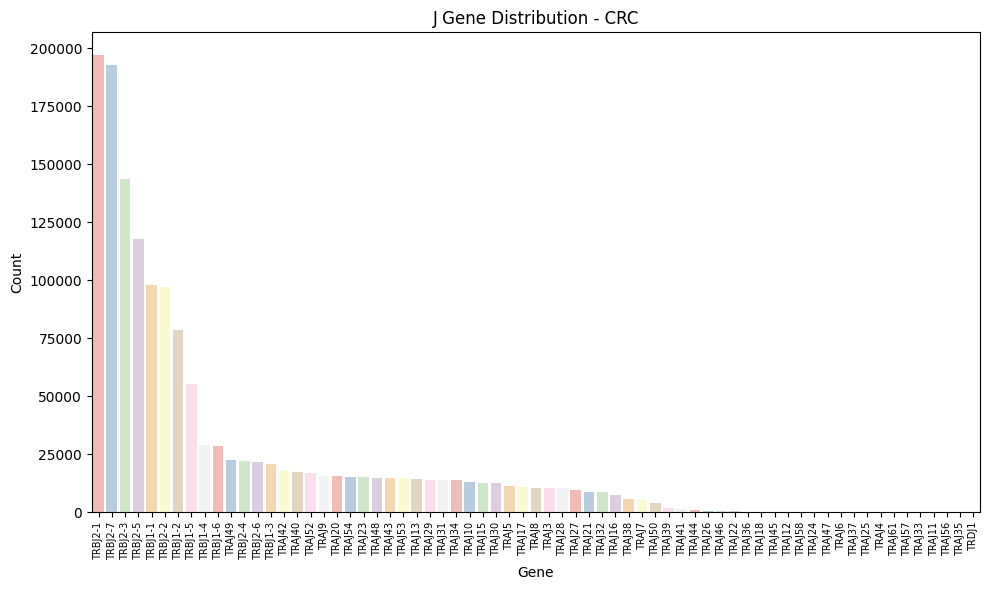

In [4]:
# Count the occurrences and sort them
gene_order = CRC_data['j_gene'].value_counts().sort_values(ascending=False).index

plot_count(df=CRC_data, X='j_gene', order=gene_order, title='J Gene Distribution - CRC', xlabel='Gene',rotation=90)

V Gene

/tmp/ipykernel_84475/2389130121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=CRC_data, x='v_gene', order=gene_order, palette='Pastel1')


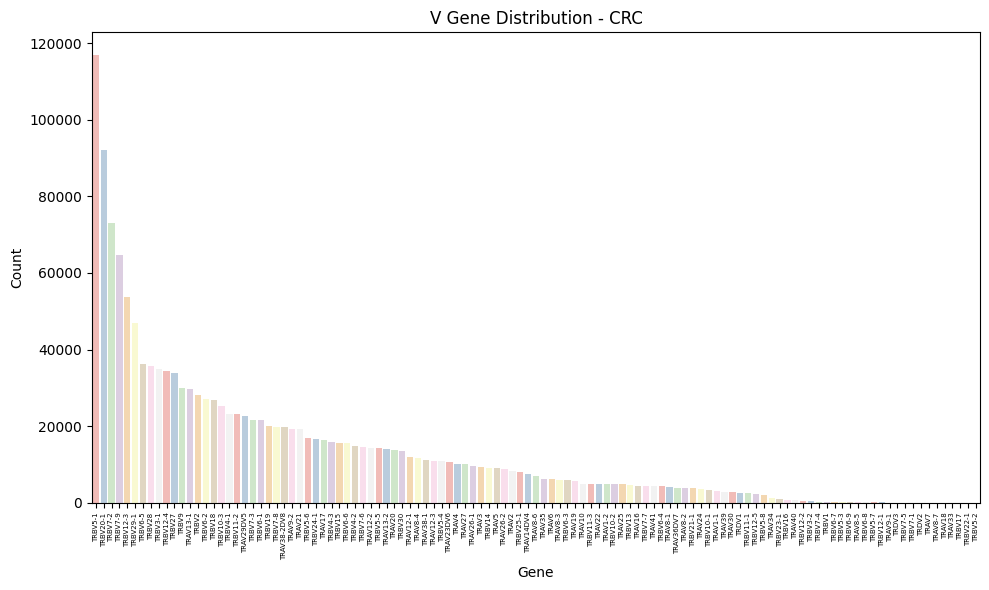

In [4]:
gene_order = CRC_data['v_gene'].value_counts().sort_values(ascending=False).index

plot_count(df=CRC_data, X='v_gene', order=gene_order, title='V Gene Distribution - CRC', xlabel='Gene',rotation=90)

#### Add T/N/M labels to the CRC Data

In [5]:
t_n_m_labels = pd.read_csv('/home/ubuntu/CRC_blood/CRC_blood_data/t_n_m_labels.csv')
# rename Unnamed: 0 to Subject
t_n_m_labels = t_n_m_labels.rename(columns={'Unnamed: 0': 'Subject'})
# remove Unnamed: 1
t_n_m_labels = t_n_m_labels.drop(columns=['Unnamed: 1'])

CRC_data['T'] = CRC_data['SampleID'].map(t_n_m_labels.set_index('Subject')['T'])
CRC_data['N'] = CRC_data['SampleID'].map(t_n_m_labels.set_index('Subject')['N'])
CRC_data['M'] = CRC_data['SampleID'].map(t_n_m_labels.set_index('Subject')['M'])
CRC_data

#### Load GSE164522 data

In [7]:
GSE164522_data = pd.read_csv('~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_all_labels.csv')
mait_label_data = pd.read_csv('/home/ubuntu/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_public_MAIT_extended.csv')
mait_label_data = mait_label_data.rename(columns={'cdr3_aa': 'CDR3.aa'})

,Unnamed: 0,barcode,patient,cdr3_aa,cdr3_nt,v_gene,j_gene,tissue
0,0,CAAGAAATCAGGCAAG-1,P08,CAARDGQKLLF,TGCGCCGCTCGAGATGGCCAGAAGCTGCTCTTT,TRAV1-1,TRAJ16,MT
1,1,CCGTACTAGAGGTACC-1,P08,CAPRDAGNMLTF,TGCGCTCCCAGAGACGCAGGCAACATGCTCACCTTT,TRAV1-1,TRAJ39,PT
2,2,CAGGTGCGTATTAGCC-1,P08,CAPWRANNLFF,TGCGCTCCGTGGAGGGCAAACAACCTCTTCTTT,TRAV1-1,TRAJ36,MN
3,3,TGACGGCTCGTCGTTC-1,P08,CAENDYKLSF,TGCGCTGAGAACGACTACAAGCTCAGCTTT,TRAV1-1,TRAJ20,MT
4,4,CGGACGTTCGCTTAGA-1,P08,CAGGYNQGGKLIF,TGCGCTGGGGGCTATAACCAGGGAGGAAAGCTTATCTTC,TRAV1-1,TRAJ23,PN
...,...,...,...,...,...,...,...,...
165289,165293,GTTCGGGCATTCTCAT-1,P17,CSVEGEREFSDTQYF,TGCAGCGTTGAGGGTGAGCGGGAGTTTTCAGATACGCAGTATTTT,TRBV29-1,TRBJ2-3,MT
165290,165294,ACGATACCAAGTACCT-1,P17,CASSYDSGREQFF,TGTGCCAGCAGTTATGATAGTGGACGCGAGCAGTTCTTC,TRBV5-4,TRBJ2-1,LN
165291,165295,TGAGAGGAGCGAAGGG-1,P17,CASSVGTSGGADEQFF,TGTGCCAGCAGCGTAGGGACTAGCGGGGGGGCTGATGAGCAGTTCTTC,TRBV9,TRBJ2-1,LN
165292,165296,GGTATTGAGGTGCAAC-1,P17,CASSLTSGSSQETQYF,TGTGCCAGCAGCTTGACTAGCGGGAGTTCACAAGAGACCCAGTACTTC,TRBV5-5,TRBJ2-5,MT


#### Subset common sequences

In [9]:
# Convert CDR3_aa columns to sets
unique_sequences_mait = set(mait_label_data['CDR3.aa'].unique())
unique_sequences_crc = set(CRC_data['CDR3.aa'].unique())

# Find the intersection of both sets
common_sequences = unique_sequences_mait.intersection(unique_sequences_crc)

# Count the number of common sequences
common_count = len(common_sequences)

print(f"Number of unique sequences from mait_label_data: {len(unique_sequences_mait)}")
print(f"Number of unique sequences from CRC_df: {len(unique_sequences_crc)}")
print(f"Number of unique sequences from mait_label_data present in CRC_df: {common_count}")


Number of unique sequences from mait_label_data: 265
Number of unique sequences from CRC_df: 1205839
Number of unique sequences from mait_label_data present in CRC_df: 146


In [10]:
# subset the mait_label_data to only include the common sequences
mait_label_data_common = mait_label_data[mait_label_data['CDR3.aa'].isin(common_sequences)]
mait_label_data_common

,Unnamed: 0,barcode,patient,CDR3.aa,cdr3_nt,v_gene,j_gene,tissue,publicity,patient_count,chain,MAIT_cell,MN_MT_MAIT_unique
8,92,TTAGGACCATTGTGCA-1,P08,CAAMDSNYQLIW,TGTGCCGCCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,10,TRA,MAIT_cell,Shared_MN_MT
9,93,GCTCCTAGTGGTCTCG-1,P08,CAAMDSNYQLIW,TGTGCCGCCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MT,1,10,TRA,MAIT_cell,Shared_MN_MT
10,94,GTAACGTTCACTTATC-1,P08,CAVMDSNYQLIW,TGTGCCGTCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MT,1,10,TRA,MAIT_cell,Shared_MN_MT
23,117,ACGGAGACAGGATTGG-1,P08,CAAMDSNYQLIW,TGTGCTGCCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,10,TRA,MAIT_cell,Shared_MN_MT
24,118,CTTACCGTCGTTGACA-1,P08,CAAMDSNYQLIW,TGTGCTGCCATGGATAGCAACTATCAGTTAATCTGG,TRAV1-2,TRAJ33,MN,1,10,TRA,MAIT_cell,Shared_MN_MT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4403,154646,ATGGGAGTCATCGCTC-1,P17,CASSDSSGTDTQYF,TGTGCCAGCAGTGACTCGTCTGGCACAGATACGCAGTATTTT,TRBV6-4,TRBJ2-3,MN,1,3,TRB,MAIT_cell,Unique_MN
4404,154647,CATATTCAGAACTCGG-1,P17,CASSDSSGTDTQYF,TGTGCCAGCAGTGACTCGTCTGGCACAGATACGCAGTATTTT,TRBV6-4,TRBJ2-3,MN,1,3,TRB,MAIT_cell,Unique_MN
4405,154648,GGTGAAGCAGTCACTA-1,P17,CASSDSSGTDTQYF,TGTGCCAGCAGTGACTCGTCTGGCACAGATACGCAGTATTTT,TRBV6-4,TRBJ2-3,MN,1,3,TRB,MAIT_cell,Unique_MN
4406,164119,GCATGTAGTAGTAGTA-1,P17,CASSLSNTGELFF,TGTGCCAGCAGTTTAAGTAACACCGGGGAGCTGTTTTTT,TRBV12-4,TRBJ2-2,LN,1,3,TRB,MAIT_cell,Other_MAIT


In [11]:
CRC_data_common = CRC_data[CRC_data['CDR3.aa'].isin(common_sequences)]
CRC_data_common

,Unnamed: 0,Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,...,V3.Deletions,J3.Deletions,Clone.ID,SampleID,v_gene,j_gene,chain,T,N,M
799,800,2,0.000174,TGTGTGGTGAGCGACAGAGGCTCAACCCTGGGGAGGCTATACTTT,CVVSDRGSTLGRLYF,TRAV10*00(1930),NaN,TRAJ18*00(621),13,NaN,...,0,-1,445,pool1_S1,TRAV10,TRAJ18,TRA,3.0,1.0,0.0
909,910,2,0.000174,TGTGCTGTGAGGGATAGCAGCTATAAATTGATCTTC,CAVRDSSYKLIF,TRAV21*00(1961),NaN,TRAJ12*00(550.3),12,NaN,...,0,-1,1167,pool1_S1,TRAV21,TRAJ12,TRA,3.0,1.0,0.0
911,912,2,0.000174,TGTGCTGTGAAAGCTGCAGGCAACAAGCTAACTTTT,CAVKAAGNKLTF,TRAV21*00(1957.3),NaN,TRAJ17*00(580),10,NaN,...,-2,-5,1172,pool1_S1,TRAV21,TRAJ17,TRA,3.0,1.0,0.0
2066,2067,2,0.000174,TGTGCCAGCTCGGACAGTTCCACAGATACGCAGTATTTT,CASSDSSTDTQYF,TRBV6-1*00(1735.5),TRBD1*00(30),TRBJ2-3*00(470),9,11.0,...,-8,-2,6218,pool1_S1,TRBV6-1,TRBJ2-3,TRB,3.0,1.0,0.0
2213,2214,1,0.000087,TGTGCTGTAAATACTGGAGGCTTCAAAACTATCTTT,CAVNTGGFKTIF,TRAV22*00(1864),NaN,TRAJ9*00(590),8,NaN,...,-5,-2,362,pool1_S1,TRAV22,TRAJ9,TRA,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481951,1481952,7,0.000608,TGTGCCAGCAGCCTCTCGAACACCGGGGAGCTGTTTTTT,CASSLSNTGELFF,"TRBV6-2*00(1451.3), TRBV6-3*00(1243.6)",NaN,TRBJ2-2*00(510.6),11,NaN,...,-6,3,45,pool9_S7,TRBV6-2,TRBJ2-2,TRB,2.0,0.0,0.0
1482181,1482182,1,0.000087,TGTGCTGTGAGAGATCACGACTACAAGCTCAGCTTT,CAVRDHDYKLSF,TRAV1-2*00(2018),NaN,TRAJ20*00(510),14,NaN,...,0,-6,154,pool9_S7,TRAV1-2,TRAJ20,TRA,2.0,0.0,0.0
1483520,1483521,1,0.000087,TGCGCCAGCAGCGGACAGGGGACCGGGGAGCTGTTTTTT,CASSGQGTGELFF,TRBV5-1*00(2010),TRBD1*00(45),TRBJ2-2*00(460),12,12.0,...,-4,-5,5184,pool9_S7,TRBV5-1,TRBJ2-2,TRB,2.0,0.0,0.0
1484352,1484353,1,0.000087,TGTGCCAGCAGTTTAACGGAGAACACTGAAGCTTTCTTT,CASSLTENTEAFF,TRBV12-3*00(2030),NaN,TRBJ1-1*00(470),15,NaN,...,-2,-1,21824,pool9_S7,TRBV12-3,TRBJ1-1,TRB,2.0,0.0,0.0


In [12]:
mait_label_data_common_unique = mait_label_data_common[['CDR3.aa', 'MN_MT_MAIT_unique']].drop_duplicates()
mait_label_data_common_unique

,CDR3.aa,MN_MT_MAIT_unique
8,CAAMDSNYQLIW,Shared_MN_MT
10,CAVMDSNYQLIW,Shared_MN_MT
32,CAAMDSSYKLIF,Shared_MN_MT
108,CAVMDSSYKLIF,Shared_MN_MT
117,CAVLDSNYQLIW,Shared_MN_MT
...,...,...
4363,CSARGLADYNEQFF,Unique_MN
4364,CASSERDTGELFF,Unique_MN
4368,CASSGQGTGELFF,Unique_MT
4370,CASSRGSTDTQYF,Other_MAIT


In [13]:
collections.Counter(mait_label_data_common_unique['MN_MT_MAIT_unique'])

Counter({'Unique_MN': 53,
         'Other_MAIT': 46,
         'Shared_MN_MT': 30,
         'Unique_MT': 17})

In [14]:
collections.Counter(mait_label_data_common['MN_MT_MAIT_unique'])

Counter({'Shared_MN_MT': 2647,
         'Unique_MN': 145,
         'Other_MAIT': 48,
         'Unique_MT': 18})

In [15]:
collections.Counter(mait_label_data['MN_MT_MAIT_unique'])

Counter({'Shared_MN_MT': 4030,
         'Unique_MN': 286,
         'Other_MAIT': 59,
         'Unique_MT': 33})

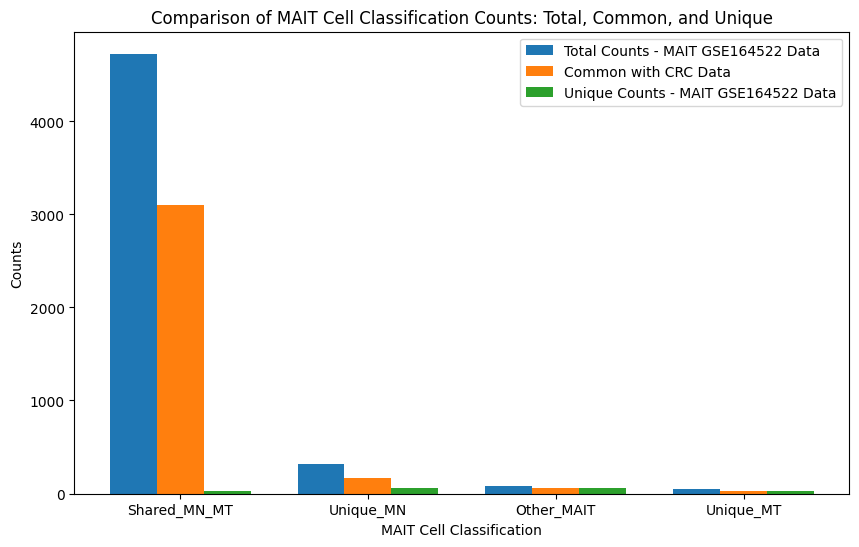

In [21]:
# Data preparation
categories = ['Shared_MN_MT', 'Unique_MN', 'Other_MAIT', 'Unique_MT']
total_counts = [4727, 322, 81, 50]  # From mait_label_data
common_counts = [3103, 164, 64, 33]  # From common sequences in CRC_data
unique_counts = [33, 58, 57, 24]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25  # Reduced bar width to fit the third set of bars
index = range(len(categories))

bars1 = ax.bar([p - bar_width for p in index], total_counts, bar_width, label='Total Counts - MAIT GSE164522 Data')
bars2 = ax.bar(index, common_counts, bar_width, label='Common with CRC Data')
bars3 = ax.bar([p + bar_width for p in index], unique_counts, bar_width, label='Unique Counts - MAIT GSE164522 Data')

ax.set_xlabel('MAIT Cell Classification')
ax.set_ylabel('Counts')
ax.set_title('Comparison of MAIT Cell Classification Counts: Total, Common, and Unique')
ax.set_xticks(index)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


In [22]:
# Example data preparation
df1 = mait_label_data[['CDR3.aa']]
df2 = CRC_data[['CDR3.aa']] 

# Step 1: Identify common sequences
common_sequences = pd.Series(list(set(df1['CDR3.aa']).intersection(set(df2['CDR3.aa']))))

# Step 2: Count frequencies in each dataset for common sequences
counts_df1 = df1[df1['CDR3.aa'].isin(common_sequences)]['CDR3.aa'].value_counts().reset_index()
counts_df1.columns = ['CDR3.aa', 'count_df1']
counts_df2 = df2[df2['CDR3.aa'].isin(common_sequences)]['CDR3.aa'].value_counts().reset_index()
counts_df2.columns = ['CDR3.aa', 'count_df2']

# Step 3: Merge the counts on sequence
merged_counts = pd.merge(counts_df1, counts_df2, on='CDR3.aa', how='outer').fillna(0)

# convert merged_counts to a dataframe
merged_counts = pd.DataFrame(merged_counts)

# make in descending order
merged_counts = merged_counts.sort_values(by=['count_df1', 'count_df2'], ascending=False)

# Display the merged_counts dataframe to see the results
print(merged_counts)

            CDR3.aa  count_df1  count_df2
107    CAVMDSNYQLIW        792          4
135    CAVRDSNYQLIW        581          3
104    CAVLDSNYQLIW        401          1
0      CAAMDSNYQLIW        377          1
152    CAVTDSNYQLIW        250          1
..              ...        ...        ...
102   CAVKETSGSRLTF          1          1
116   CAVNVYGNNRLAF          1          1
143  CAVRNTGTASKLTF          1          1
163  CIVRVENTGNQFYF          1          1
168    CVVNNYGQNFVF          1          1

[172 rows x 3 columns]


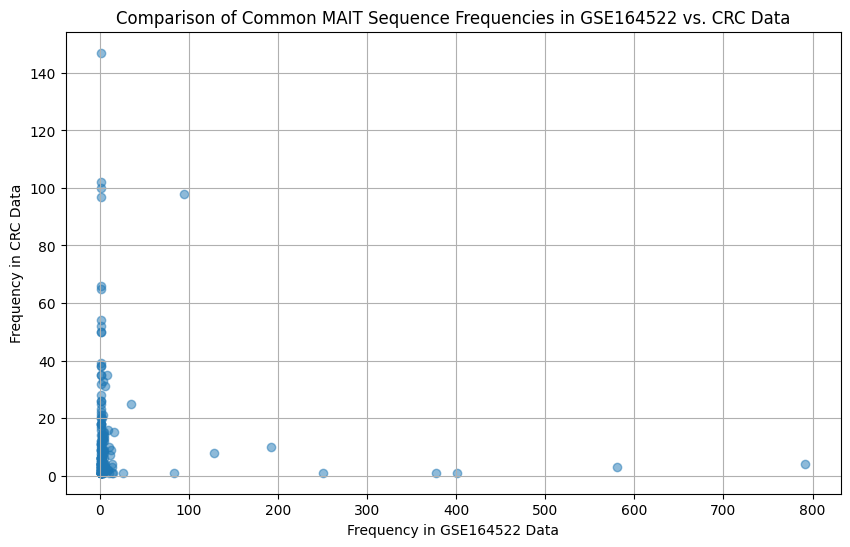

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_counts['count_df1'], merged_counts['count_df2'], alpha=0.5)
plt.title('Comparison of Common MAIT Sequence Frequencies in GSE164522 vs. CRC Data')
plt.xlabel('Frequency in GSE164522 Data')
plt.ylabel('Frequency in CRC Data')
plt.grid(True)
plt.show()

#### Correlation between sequnece and labels

##### Sequence correlation with N/M label

In [16]:
CRC_data_M = CRC_data[~CRC_data['M'].isnull()]
CRC_data_N = CRC_data[~CRC_data['N'].isnull()]
CRC_data_M

,Unnamed: 0,Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,...,V3.Deletions,J3.Deletions,Clone.ID,SampleID,v_gene,j_gene,chain,T,N,M
0,1,91,0.007901,TGTGCCAGCAGGGAGAATCTCTCCTACGAGCAGTACTTC,CASRENLSYEQYF,TRBV6-5*00(1959.9),NaN,TRBJ2-7*00(469.8),11,NaN,...,-6,0,0,pool1_S1,TRBV6-5,TRBJ2-7,TRB,3.0,1.0,0.0
1,2,77,0.006686,TGCGCCAGCAGCGCCAGCCCTTTAGCGGGGGGGCAGGGTGAGCAGT...,CASSASPLAGGQGEQFF,TRBV5-1*00(1877.2),TRBD2*00(46),TRBJ2-1*00(410),12,22.0,...,-4,-9,2,pool1_S1,TRBV5-1,TRBJ2-1,TRB,3.0,1.0,0.0
2,3,73,0.006338,TGCGCCAGCAGCTTGACCGGATCCGCCTACGAGCAGTACTTC,CASSLTGSAYEQYF,TRBV5-1*00(1991.3),NaN,TRBJ2-7*00(450),15,NaN,...,-1,-2,1,pool1_S1,TRBV5-1,TRBJ2-7,TRB,3.0,1.0,0.0
3,4,61,0.005297,TGCAGCGCCGATCAGGGGTCGAATGAGCAGTTCTTC,CSADQGSNEQFF,TRBV29-1*00(1925.9),TRBD1*00(31),TRBJ2-1*00(430),7,12.0,...,-7,-7,3,pool1_S1,TRBV29-1,TRBJ2-1,TRB,3.0,1.0,0.0
4,5,45,0.003907,TGTGCCAGCAGCTCGAGGGGCCTTCAGAACTATGGCTACACCTTC,CASSSRGLQNYGYTF,TRBV7-9*00(1950.9),TRBD2*00(31),TRBJ1-2*00(460),13,14.0,...,-4,-2,4,pool1_S1,TRBV7-9,TRBJ1-2,TRB,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1484602,1484603,1,0.000087,TGCAGCGTTGGAGAGGCCGGGGAGCTGTTTTTT,CSVGEAGELFF,TRBV29-1*00(2051),NaN,TRBJ2-2*00(450),14,NaN,...,0,-6,26434,pool9_S7,TRBV29-1,TRBJ2-2,TRB,2.0,0.0,0.0
1484603,1484604,1,0.000087,TGCAGCGTTGAGAACCGCTACGAGCAGTACTTC,CSVENRYEQYF,TRBV29-1*00(2050),NaN,TRBJ2-7*00(440),11,NaN,...,-3,-3,26437,pool9_S7,TRBV29-1,TRBJ2-7,TRB,2.0,0.0,0.0
1484604,1484605,1,0.000087,TGCAGCGTCGCCGACAGGGGAGCCATATATTTT,CSVADRGAIYF,TRBV29-1*00(2020),TRBD1*00(40),TRBJ1-3*00(390),8,12.0,...,-6,-11,26450,pool9_S7,TRBV29-1,TRBJ1-3,TRB,2.0,0.0,0.0
1484605,1484606,1,0.000087,TGCAGCGTAGTCCCCCGGGATGAGCAGTTCTTC,CSVVPRDEQFF,TRBV29-1*00(1639),"TRBD1*00(30), TRBD2*00(30)",TRBJ2-1*00(420),8,13.0,...,-6,-8,26461,pool9_S7,TRBV29-1,TRBJ2-1,TRB,2.0,0.0,0.0


#### M Label Overlap with GSE1164522 Data

In [17]:
# show the M column for each subject
subject_M = CRC_data_M[['SampleID', 'M']]
subject_M.drop_duplicates(inplace=True)

collections.Counter(subject_M['M'])

/tmp/ipykernel_310840/3271044505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_M.drop_duplicates(inplace=True)


Counter({0.0: 118, 1.0: 15})

In [18]:
CRC_data_M0 = CRC_data_M[CRC_data_M['M'] == 0]
CRC_data_M1 = CRC_data_M[CRC_data_M['M'] == 1]
# delete case where T=0 and M=1
CRC_data_M1 = CRC_data_M1[~((CRC_data_M1['T'] == 0) & (CRC_data_M1['M'] == 1))]
CRC_data_M1

,Unnamed: 0,Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,...,V3.Deletions,J3.Deletions,Clone.ID,SampleID,v_gene,j_gene,chain,T,N,M
599951,599952,63,0.005470,TGTGCCAGCTCACCAAAGACGCAGTTACTAGCCAAAAACATTCAGT...,CASSPKTQLLAKNIQYF,TRBV18*00(1847.7),NaN,TRBJ2-4*00(519.9),15,NaN,...,-2,2,0,pool4_S24,TRBV18,TRBJ2-4,TRB,3.0,0.0,1.0
599952,599953,39,0.003386,TGTGCCAGCAGTTTGGGGCGGGATCTCTACAATGAGCAGTTCTTC,CASSLGRDLYNEQFF,TRBV27*00(1937.1),"TRBD1*00(30), TRBD2*00(30)",TRBJ2-1*00(470),14,14.0,...,-3,-3,3,pool4_S24,TRBV27,TRBJ2-1,TRB,3.0,0.0,1.0
599953,599954,37,0.003213,TGTGCCAGCAGCCTGCTCCGAAATGAGCAGTTCTTC,CASSLLRNEQFF,TRBV7-9*00(2017.1),NaN,TRBJ2-1*00(430.6),12,NaN,...,-5,1,1,pool4_S24,TRBV7-9,TRBJ2-1,TRB,3.0,0.0,1.0
599954,599955,32,0.002779,TGTGCCAGCAGTTATAGGGGACGGCGGGCCAAAAACATTCAGTACTTC,CASSYRGRRAKNIQYF,TRBV28*00(1902),"TRBD2*00(29), TRBD1*00(26)",TRBJ2-4*00(490),13,14.0,...,-4,-1,4,pool4_S24,TRBV28,TRBJ2-4,TRB,3.0,0.0,1.0
599955,599956,31,0.002692,TGTGCCAGCAGCTTAGCCCTTAGTACCAAAAACATTCAGTACTTC,CASSLALSTKNIQYF,TRBV7-2*00(1979.9),NaN,TRBJ2-4*00(479.8),17,NaN,...,0,-2,2,pool4_S24,TRBV7-2,TRBJ2-4,TRB,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344100,1344101,1,0.000087,TGCAGCGTTGTGGGGGGTGGCTACACCGTC,CSVVGGGYTV,TRBV29-1*00(1991),TRBD1*00(25),TRBJ1-2*00(381),10,11.0,...,-4,-7,223016,pool9_S10,TRBV29-1,TRBJ1-2,TRB,4.0,2.0,1.0
1344101,1344102,1,0.000087,TGCAGCGTTGCGGACCCGGGCTACACCTTC,CSVADPGYTF,TRBV29-1*00(2020),NaN,TRBJ1-2*00(400),10,NaN,...,-4,-8,223022,pool9_S10,TRBV29-1,TRBJ1-2,TRB,4.0,2.0,1.0
1344102,1344103,1,0.000087,TGCAGCGTACAGGACTACGAGCAGTACTTC,CSVQDYEQYF,TRBV29-1*00(2090),TRBD1*00(25),TRBJ2-7*00(440),8,8.0,...,-6,-3,223066,pool9_S10,TRBV29-1,TRBJ2-7,TRB,4.0,2.0,1.0
1344103,1344104,1,0.000087,TGCAGCGTTGGGGAAGGCTACACCTTC,CSVGEGYTF,TRBV29-1*00(2061),NaN,TRBJ1-2*00(400),10,NaN,...,-4,-8,223185,pool9_S10,TRBV29-1,TRBJ1-2,TRB,4.0,2.0,1.0


In [21]:
CRC_data_N1_N2 = CRC_data_N[(CRC_data_N['N'] == 1) | (CRC_data_N['N'] == 2)]
CRC_data_N1_N2

,Unnamed: 0,Clones,Proportion,CDR3.nt,CDR3.aa,V.name,D.name,J.name,V.end,D.start,...,V3.Deletions,J3.Deletions,Clone.ID,SampleID,v_gene,j_gene,chain,T,N,M
0,1,91,0.007901,TGTGCCAGCAGGGAGAATCTCTCCTACGAGCAGTACTTC,CASRENLSYEQYF,TRBV6-5*00(1959.9),NaN,TRBJ2-7*00(469.8),11,NaN,...,-6,0,0,pool1_S1,TRBV6-5,TRBJ2-7,TRB,3.0,1.0,0.0
1,2,77,0.006686,TGCGCCAGCAGCGCCAGCCCTTTAGCGGGGGGGCAGGGTGAGCAGT...,CASSASPLAGGQGEQFF,TRBV5-1*00(1877.2),TRBD2*00(46),TRBJ2-1*00(410),12,22.0,...,-4,-9,2,pool1_S1,TRBV5-1,TRBJ2-1,TRB,3.0,1.0,0.0
2,3,73,0.006338,TGCGCCAGCAGCTTGACCGGATCCGCCTACGAGCAGTACTTC,CASSLTGSAYEQYF,TRBV5-1*00(1991.3),NaN,TRBJ2-7*00(450),15,NaN,...,-1,-2,1,pool1_S1,TRBV5-1,TRBJ2-7,TRB,3.0,1.0,0.0
3,4,61,0.005297,TGCAGCGCCGATCAGGGGTCGAATGAGCAGTTCTTC,CSADQGSNEQFF,TRBV29-1*00(1925.9),TRBD1*00(31),TRBJ2-1*00(430),7,12.0,...,-7,-7,3,pool1_S1,TRBV29-1,TRBJ2-1,TRB,3.0,1.0,0.0
4,5,45,0.003907,TGTGCCAGCAGCTCGAGGGGCCTTCAGAACTATGGCTACACCTTC,CASSSRGLQNYGYTF,TRBV7-9*00(1950.9),TRBD2*00(31),TRBJ1-2*00(460),13,14.0,...,-4,-2,4,pool1_S1,TRBV7-9,TRBJ1-2,TRB,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472963,1472964,1,0.000087,TGTGCCAGCGGGGAGACCCAGTACTTC,CASGETQYF,TRBV7-8*00(2052),NaN,TRBJ2-5*00(430),9,NaN,...,-8,-5,25668,pool9_S5,TRBV7-8,TRBJ2-5,TRB,3.0,1.0,0.0
1472964,1472965,1,0.000087,TGTGCCAGCAGCTTCCCCCAGTATTTT,CASSFPQYF,TRBV5-6*00(2140),NaN,TRBJ2-3*00(370),14,NaN,...,-2,-12,25670,pool9_S5,TRBV5-6,TRBJ2-3,TRB,3.0,1.0,0.0
1472965,1472966,1,0.000087,TGCAGCGTCGGGGACCTGACCTTC,CSVGDLTF,TRBV29-1*00(2061),"TRBD1*00(25), TRBD2*00(25)",TRBJ1-2*00(340),8,10.0,...,-6,-14,25690,pool9_S5,TRBV29-1,TRBJ1-2,TRB,3.0,1.0,0.0
1472966,1472967,1,0.000087,TGCAGTGCTTTGACAATATTT,CSALTIF,TRBV20-1*00(2160),NaN,TRBJ1-1*00(310),9,NaN,...,-5,-17,25694,pool9_S5,TRBV20-1,TRBJ1-1,TRB,3.0,1.0,0.0


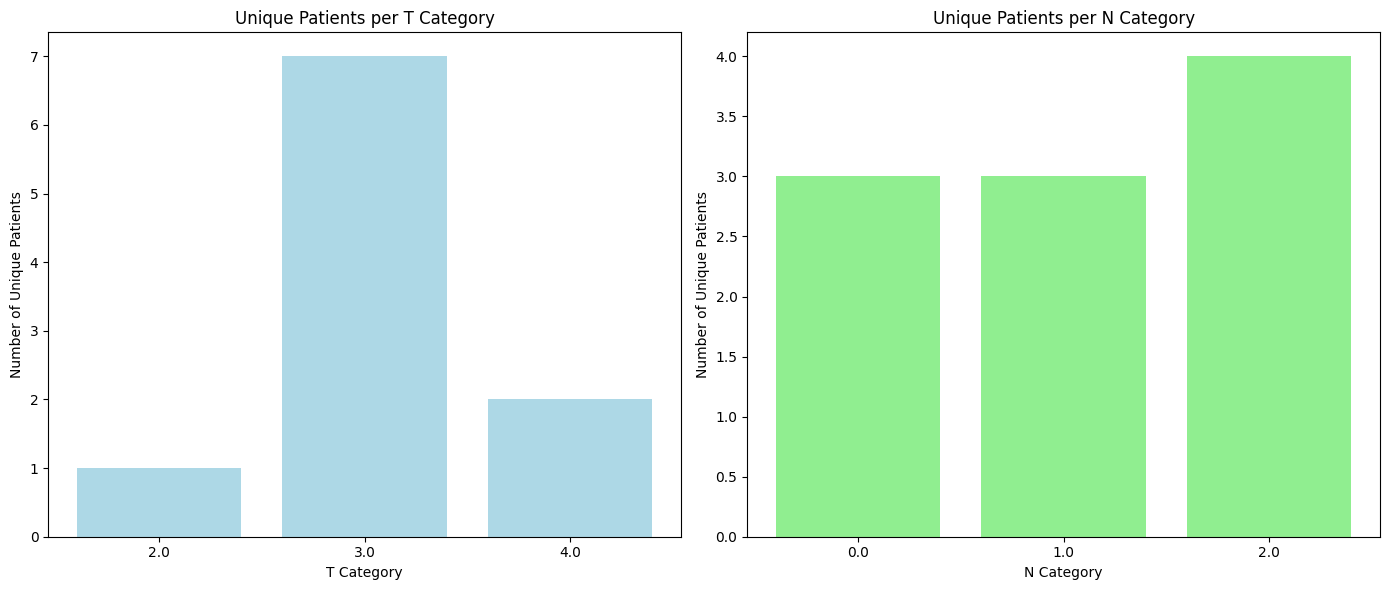

In [22]:
# Counting unique patients in each T category
unique_patients_per_T = CRC_data_M1.drop_duplicates(subset=['SampleID']).groupby('T').size()

# Counting unique patients in each N category
unique_patients_per_N = CRC_data_M1.drop_duplicates(subset=['SampleID']).groupby('N').size()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for T categories
axs[0].bar(unique_patients_per_T.index.astype(str), unique_patients_per_T.values, color='lightblue')
axs[0].set_title('Unique Patients per T Category')
axs[0].set_xlabel('T Category')
axs[0].set_ylabel('Number of Unique Patients')
axs[0].set_xticks(unique_patients_per_T.index.astype(str))  # Ensures all categories are shown

# Plot for N categories
axs[1].bar(unique_patients_per_N.index.astype(str), unique_patients_per_N.values, color='lightgreen')
axs[1].set_title('Unique Patients per N Category')
axs[1].set_xlabel('N Category')
axs[1].set_ylabel('Number of Unique Patients')
axs[1].set_xticks(unique_patients_per_N.index.astype(str))  # Ensures all categories are shown

plt.tight_layout()
plt.show()

##### Common Sequences M1

In [23]:
# present the common sequences present in both CRC_data_M1 and GSE164522_data
common_sequences_M1 = pd.Series(list(set(CRC_data_M1['CDR3.aa']).intersection(set(GSE164522_data['cdr3_aa']))))
print("There are {} common sequences between CRC_data_M1 and GSE164522_data.".format(len(common_sequences_M1)))
print("There are {} unique sequences in CRC_data_M1.".format(len(CRC_data_M1['CDR3.aa'].unique())))
print("There are {} unique sequences in GSE164522_data.".format(len(GSE164522_data['cdr3_aa'].unique())))

# calculate the percentage of common sequences in CRC_data_M1
common_percentage = len(common_sequences_M1) / len(CRC_data_M1['CDR3.aa'].unique()) * 100
print("The percentage of common sequences in CRC_data_M1 is {:.2f}%.".format(common_percentage))

# present the patients that have common sequences in both datasets
common_patients = CRC_data_M1[CRC_data_M1['CDR3.aa'].isin(common_sequences_M1)]['SampleID'].unique()
print("The number of patients with common sequences in CRC_data_M1 is {} out of {}.".format(len(common_patients), len(CRC_data_M1['SampleID'].unique())))

There are 4149 common sequences between CRC_data_M1 and GSE164522_data.
There are 78273 unique sequences in CRC_data_M1.
There are 95816 unique sequences in GSE164522_data.
The percentage of common sequences in CRC_data_M1 is 5.30%.
The number of patients with common sequences in CRC_data_M1 is 10 out of 10.


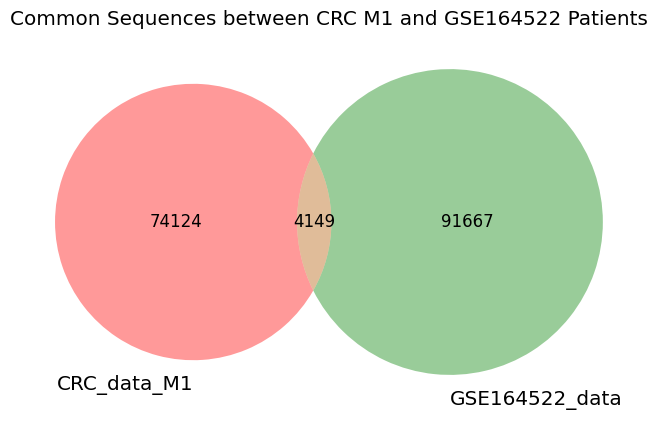

In [30]:
# plot venn diagram for common sequences between CRC_data_M1 and GSE164522_data
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Calculate the number of unique sequences in each dataset
unique_sequences_crc_m1 = set(CRC_data_M1['CDR3.aa'])
unique_sequences_gse164522 = set(GSE164522_data['cdr3_aa'])

# Calculate the number of common sequences
common_sequences = unique_sequences_crc_m1.intersection(unique_sequences_gse164522)

# Plot the Venn diagram
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
venn2([unique_sequences_crc_m1, unique_sequences_gse164522], set_labels=('CRC_data_M1', 'GSE164522_data'))
plt.title('Common Sequences between CRC M1 and GSE164522 Patients')
plt.savefig('/home/ubuntu/CRC_Project/single_cell_data/GSE164522_colon_data/plots/venn_overlap_gse164522_CRC_M1.png', dpi=1200)
plt.show()


##### Common Sequences M0

In [25]:
# present the common sequences present in both CRC_data_M0 and GSE164522_data
common_sequences_M0 = pd.Series(list(set(CRC_data_M0['CDR3.aa']).intersection(set(GSE164522_data['cdr3_aa']))))
print("There are {} common sequences between CRC_data_M0 and GSE164522_data.".format(len(common_sequences_M0)))
print("There are {} unique sequences in CRC_data_M0.".format(len(CRC_data_M0['CDR3.aa'].unique())))
print("There are {} unique sequences in GSE164522_data.".format(len(GSE164522_data['cdr3_aa'].unique())))

# calculate the percentage of common sequences in CRC_data_M0
common_percentage = len(common_sequences_M0) / len(CRC_data_M0['CDR3.aa'].unique()) * 100
print("The percentage of common sequences in CRC_data_M0 is {:.2f}%.".format(common_percentage))

# present the patients that have common sequences in both datasets
common_patients = CRC_data_M0[CRC_data_M0['CDR3.aa'].isin(common_sequences_M0)]['SampleID'].unique()
print("The number of patients with common sequences in CRC_data_M0 is {} out of {}.".format(len(common_patients), len(CRC_data_M0['SampleID'].unique())))

There are 16934 common sequences between CRC_data_M0 and GSE164522_data.
There are 728068 unique sequences in CRC_data_M0.
There are 95816 unique sequences in GSE164522_data.
The percentage of common sequences in CRC_data_M0 is 2.33%.
The number of patients with common sequences in CRC_data_M0 is 118 out of 118.


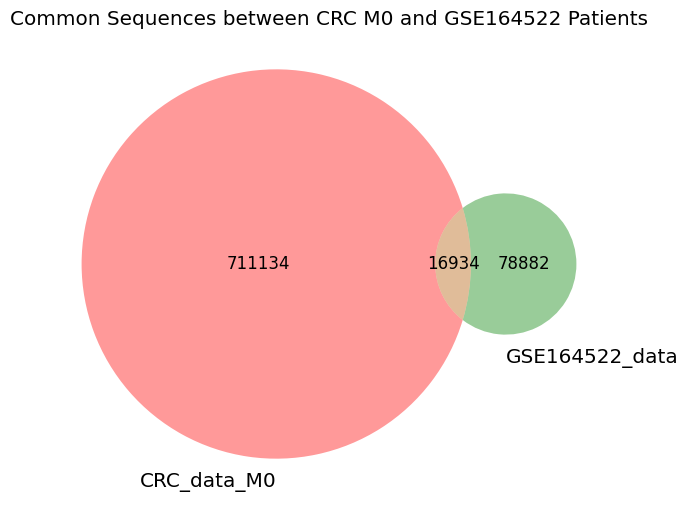

In [28]:
# Calculate the number of unique sequences in each dataset
unique_sequences_crc_m0 = set(CRC_data_M0['CDR3.aa'])
unique_sequences_gse164522 = set(GSE164522_data['cdr3_aa'])

# Calculate the number of common sequences
common_sequences = unique_sequences_crc_m0.intersection(unique_sequences_gse164522)

# Plot the Venn diagram
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
venn2([unique_sequences_crc_m0, unique_sequences_gse164522], set_labels=('CRC_data_M0', 'GSE164522_data'))
plt.title('Common Sequences between CRC M0 and GSE164522 Patients')
plt.savefig('/home/ubuntu/CRC_Project/single_cell_data/GSE164522_colon_data/plots/venn_overlap_gse164522_CRC_M0.png', dpi=1200)
plt.show()

Common Sequences N1/N2

In [75]:
# present the common sequences present in both CRC_data_M0 and GSE164522_data
common_sequences_N1N2 = pd.Series(list(set(CRC_data_N1_N2['CDR3.aa']).intersection(set(GSE164522_data['cdr3_aa']))))
print("There are {} common sequences between CRC_data_N1N2 and GSE164522_data.".format(len(common_sequences_N1N2)))
print("There are {} unique sequences in CRC_data_N1N2.".format(len(CRC_data_N['CDR3.aa'].unique())))
print("There are {} unique sequences in GSE164522_data.".format(len(GSE164522_data['cdr3_aa'].unique())))

# calculate the percentage of common sequences in CRC_data_M0
common_percentage = len(common_sequences_N1N2) / len(CRC_data_N['CDR3.aa'].unique()) * 100
print("The percentage of common sequences in CRC_data_N1N2 is {:.2f}%.".format(common_percentage))

# present the patients that have common sequences in both datasets
common_patients = CRC_data_N1_N2[CRC_data_N1_N2['CDR3.aa'].isin(common_sequences_N1N2)]['SampleID'].unique()
print("The number of patients with common sequences in CRC_data_N1N2 is {} out of {}.".format(len(common_patients), len(CRC_data_N['SampleID'].unique())))

There are 11673 common sequences between CRC_data_N1N2 and GSE164522_data.
There are 991666 unique sequences in CRC_data_N1N2.
There are 95816 unique sequences in GSE164522_data.
The percentage of common sequences in CRC_data_N1N2 is 1.18%.
The number of patients with common sequences in CRC_data_N1N2 is 53 out of 161.


Look at the tissues in which the common M1 & GSE164522 are in

In [ ]:
GSE164522_data_M1_common = GSE164522_data[GSE164522_data['cdr3_aa'].isin(common_sequences_M1)]
CRC_data_M1_common = CRC_data_M1[CRC_data_M1['CDR3.aa'].isin(common_sequences_M1)]

In [65]:
collections.Counter(GSE164522_data_M1_common['tissue'])

Counter({'PT': 2085,
         'MT': 2076,
         'PBMC': 2444,
         'MN': 2593,
         'PN': 895,
         'LN': 1689})

In [61]:
# calculate the number of times each sequence appears in CRC_data_M1
sequence_counts = CRC_data_M1_common['CDR3.aa'].value_counts()
sequence_counts

CDR3.aa
CAVNQAGTALIF       11
CAVLNQAGTALIF      10
CAVRDGDYKLSF       10
CAVNTGFQKLVF        9
CAVNFGNEKLTF        9
                   ..
CASSPSPQETQYF       1
CASTKTDTQYF         1
CASSPGTSAYNEQFF     1
CASSLDRQGADTQYF     1
CASSRIYEQYF         1
Name: count, Length: 4149, dtype: int64

#### Export Overlap Data

In [62]:
GSE164522_data_M1_common.to_csv('~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_data_common_CRC_M1.csv', index=False)

In [76]:
GSE164522_data_N1N2_common = GSE164522_data[GSE164522_data['cdr3_aa'].isin(common_sequences_N1N2)]
GSE164522_data_N1N2_common.to_csv('~/CRC_Project/single_cell_data/GSE164522_colon_data/GSE164522_data_common_CRC_N1N2.csv', index=False)